In [1]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/NLP_Workspace/Data/'

import matplotlib.pyplot as plt
import csv
import pandas as pd

Mounted at /content/drive


In [2]:
df = pd.read_csv(data_path + "emoji_labeled_data_nonltk_BERT.csv")
df = df.dropna(how='any',axis=0)

In [3]:
df.sample(10)

,type,text,word count,label
84725,ESTJ,"lol, i would say it was built on football, but...",38,6
15217,ENFP,"aw, how cute. ducks are wonderful that way, ar...",36,1
82003,ESTJ,"all in all, i have had a few sips of beer, and...",38,6
101869,INFJ,i honestly have no idea. i just needed to say ...,36,8
173079,ISFP,"182650 182658 yes, i keep a journal (this is m...",35,13
51992,ESFJ,i only put things in categories as a last reso...,37,4
165830,ISFP,9s fear the separation from their own selves t...,36,13
170434,ISFP,hello there friend!!! <positive emoji> to perc...,18,13
188068,ISTP,this seems more accurate actually.,5,15
60253,ESFJ,"perfect! thank you, sapphire sage! i placed th...",30,4


In [4]:
df_label = df['label']

In [5]:
df_label.sample(10)

84316      6
189082    15
160341    12
86175      6
51808      4
153506    12
156894    12
153134    12
134810    10
59412      4
Name: label, dtype: int64

In [6]:
df_data = df['text']

In [7]:
df_data.sample(10)

88014     wait that's a dog? ^^possibly the reasoning be...
71310                        esfp tmlt get angry at insects
3134      it won't break her if there is something else ...
61627                                 anything of this guy:
72969     chicken & mushroom pot noodle big up healthy e...
39354     nujabes exactly! i still haven't figured out i...
83563     one of my best friends is extremely bipolar an...
85184     superficially definitely being the key. that's...
83632           ah man that sucks! for you <negative emoji>
158445    definitely agree. in fact, i was actually thin...
Name: text, dtype: object

In [8]:
df_label.describe()

count    200254.000000
mean          7.500075
std           4.609746
min           0.000000
25%           4.000000
50%           8.000000
75%          11.750000
max          15.000000
Name: label, dtype: float64

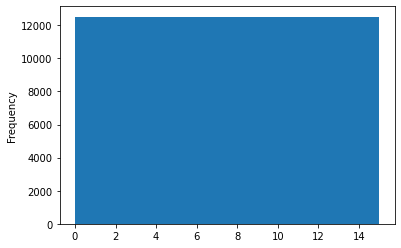

In [9]:
ax = df_label.plot.hist(bins=16)

In [10]:
E_class = [0, 1, 2, 3, 4, 5, 6, 7]     ### See Data Preprocessing Code --> duplication_reduction.ipynb
I_class = [8, 9, 10, 11, 12, 13, 14, 15]

N_class = [0, 1, 2, 3, 8, 9, 10, 11]
S_class = [4, 5, 6, 7, 12, 13, 14, 15]

F_class = [0, 1, 4, 5, 8, 9, 12, 13]
T_class = [2, 3, 6, 7, 10, 11, 14, 15]

J_class = [0, 2, 4, 6, 8, 10, 12, 14]
P_class = [1, 3, 5, 7, 9, 11, 13, 15]

In [11]:
df_all = pd.concat([df_label, df_data], axis=1)

In [12]:
df_all.sample(10)

,label,text
72098,5,this is a hard one. i guess: -write a book (or...
94414,7,"bed: isfp marry: infj kiss: infp enfj, esfj, esfp"
3234,0,i don't know about other enfjs but i always re...
157860,12,"i'm spiritual with interests in agnosticism, s..."
38712,3,i wanna i wanna.....k k kill..........or....ha...
27527,2,"curious though, even though we sit here and re..."
7925,0,"when a friend tells you, i fight with all of m..."
124575,9,the way they explained bmti to me is that it i...
66633,5,"....but i did, so can you type me? gracias <po..."
106178,8,"all right, then you came up with the 15 post t..."


In [13]:
df_E = df_all[df_all['label'].isin(E_class)]
df_I = df_all[df_all['label'].isin(I_class)]

df_N = df_all[df_all['label'].isin(N_class)]
df_S = df_all[df_all['label'].isin(S_class)]

df_F = df_all[df_all['label'].isin(F_class)]
df_T = df_all[df_all['label'].isin(T_class)]

df_J = df_all[df_all['label'].isin(J_class)]
df_P = df_all[df_all['label'].isin(P_class)]

In [14]:
df_P.sample(20)

,label,text
38775,3,i want one too. you wanna skype me? autonomy.d...
40294,3,"more or less, lelouch is also a strong contend..."
147407,11,"i'm not saying your wrong, but i still don't l..."
121273,9,the tests are usually pretty bad anyway. badly...
94583,7,i am an entp but i like intjs because they are...
165695,13,my closest friends at uni are: esfp isfp isfp ...
91733,7,nahh you're an intp now? <positive emoji>
91379,7,here's a screenshot of all the dumbfucks...
144470,11,i like women who are not easily influenced. to...
21958,1,my soul is inside a locked room. it is has fou...


In [15]:
df_E = df_E.assign(label=0)
df_N = df_N.assign(label=0)
df_F = df_F.assign(label=0)
df_J = df_J.assign(label=0)

df_I = df_I.assign(label=1)
df_S = df_S.assign(label=1)
df_T = df_T.assign(label=1)
df_P = df_P.assign(label=1)

In [16]:
df_P.sample(10)

,label,text
14574,1,oh yeah i get some pretty graphic ideas someti...
45758,1,i will play devils advocate here for a second ...
69498,1,that's why you never trust tests and type your...
188545,1,it's funny to see those distinct types of pers...
172756,1,"okay so i'm pretty darn sure i am an isfp, but..."
194086,1,i bought it <negative emoji> couldn't find a f...
41331,1,this could be called an extension of the old e...
141010,1,my scores are: liberty 75% care 72.2% fairness...
121195,1,i tend to find that the functions i understand...
87918,1,get it while it lasts


In [17]:
df_EI = pd.concat([df_E, df_I], axis=0)
df_NS = pd.concat([df_N, df_S], axis=0)
df_FT = pd.concat([df_F, df_T], axis=0)
df_JP = pd.concat([df_J, df_P], axis=0)

In [18]:
df_EI.describe()

,label
count,200254.000000
mean,0.500005
std,0.500001
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [19]:
df_EI.to_csv(data_path+"BERT_data/E_vs_I_data_withEmoji.csv", index=False)
df_NS.to_csv(data_path+"BERT_data/N_vs_S_data_withEmoji.csv", index=False)
df_FT.to_csv(data_path+"BERT_data/F_vs_T_data_withEmoji.csv", index=False)
df_JP.to_csv(data_path+"BERT_data/J_vs_P_data_withEmoji.csv", index=False)